# Paso 1. Acceda los datos y prepáralos para el análisis

In [1]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
#LEER TODOS LOS CSVs
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs= pd.read_csv('/datasets/costs_us.csv')

In [3]:
#Probar correcta importacion
print(df_visits.head())
print(df_orders.head())
print(df_costs.head())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06

In [4]:
#Validar cuantas filas tienen al menos un valor nulo
print(df_visits.isnull().any(axis=1).sum())
print(df_orders.isnull().any(axis=1).sum())
print(df_costs.isnull().any(axis=1).sum())

0
0
0


In [5]:
#verificar valores duplicados
print(df_visits.duplicated().sum())
print(df_orders.duplicated().sum())
print(df_costs.duplicated().sum())

0
0
0


In [6]:
#Verificar los tipos de datos
df_visits.info()
df_orders.info()
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [7]:
#Conversiones
df_visits['End Ts']=pd.to_datetime(df_visits['End Ts'])
df_visits['Start Ts']=pd.to_datetime(df_visits['Start Ts'])
df_orders['Buy Ts']=pd.to_datetime(df_orders['Buy Ts'])
df_costs['dt']=pd.to_datetime(df_costs['dt'])

In [8]:
#Verificar datos nuevamente
df_visits.info()
df_orders.info()
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

# Paso 2. Haz informes y calcula métricas 

## ¿Cuántas personas lo usan cada día, semana y mes?

In [9]:
#DAU
df_visits['date']=df_visits['Start Ts'].dt.date
dialy_users = df_visits.groupby("date")['Uid'].nunique()
print("Usuarios diarios")
display(dialy_users.head())

#WAU
df_visits['week']=df_visits['Start Ts'].dt.to_period('W').apply(lambda r:r.start_time.date())
week_users = df_visits.groupby("week")['Uid'].nunique()
print("Usuarios semanales")
display(week_users.head())

#MAU
df_visits['month']=df_visits['Start Ts'].dt.to_period('M').astype(str)
month_users = df_visits.groupby("month")['Uid'].nunique()
print("Usuarios mensuales")
display(month_users.head())

Usuarios diarios


date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Usuarios semanales


week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: Uid, dtype: int64

Usuarios mensuales


month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Name: Uid, dtype: int64

## ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [10]:
df_visits['date']=df_visits['Start Ts'].dt.date
dialy_sessions = df_visits.groupby("date")['Start Ts'].count().reset_index()
print("Sesiones diarias")
display(dialy_sessions.head())
dialy_sessions.info()

Sesiones diarias


,date,Start Ts
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      364 non-null    object
 1   Start Ts  364 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


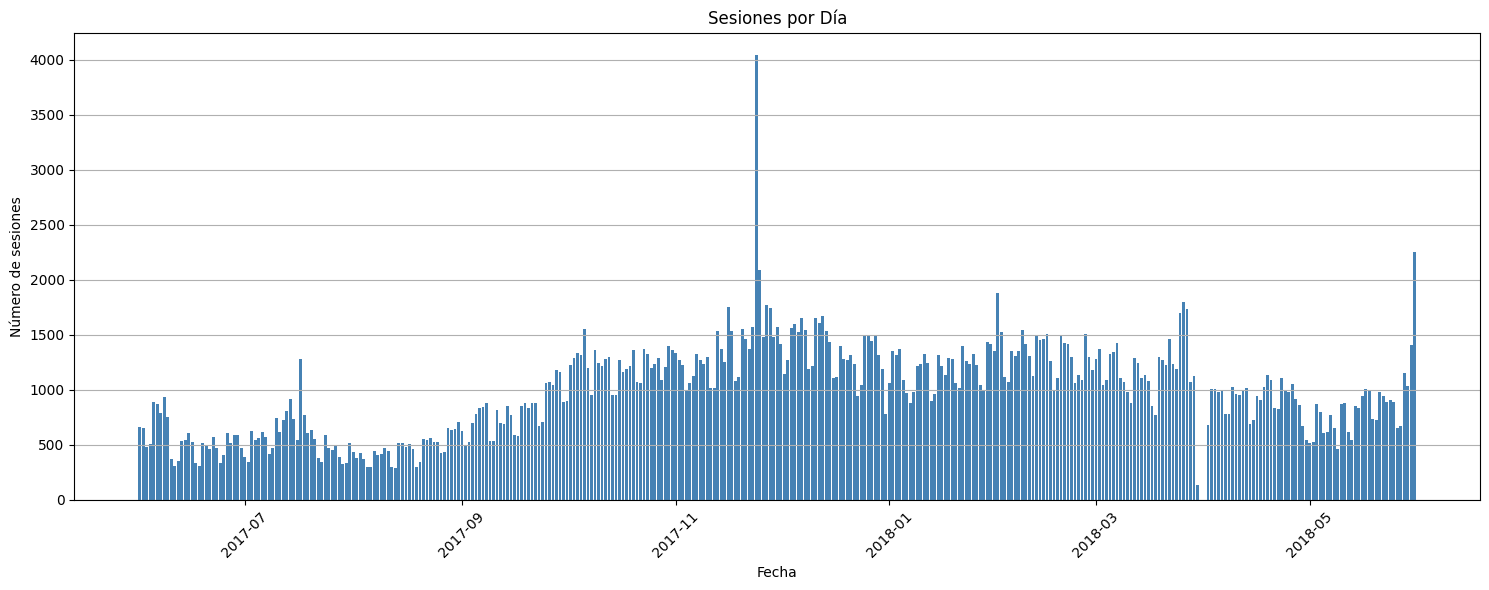

In [44]:
# Ordenar por fecha (opcional pero útil)
dialy_sessions = dialy_sessions.sort_values('date')

# Crear gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(dialy_sessions['date'], dialy_sessions['Start Ts'], color='steelblue')

# Etiquetas y título
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de sesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## ¿Cuál es la duración de cada sesión?

In [46]:
df_visits['session_duration'] = (df_visits['End Ts']-df_visits['Start Ts']).dt.total_seconds() / 60
print("Duración de sesión en minutos")
display(df_visits['session_duration'].head(10))

Duración de sesión en minutos


0    18.0
1    28.0
2     0.0
3    24.0
4     0.0
5     1.0
6    56.0
7     1.0
8     3.0
9     1.0
Name: session_duration, dtype: float64

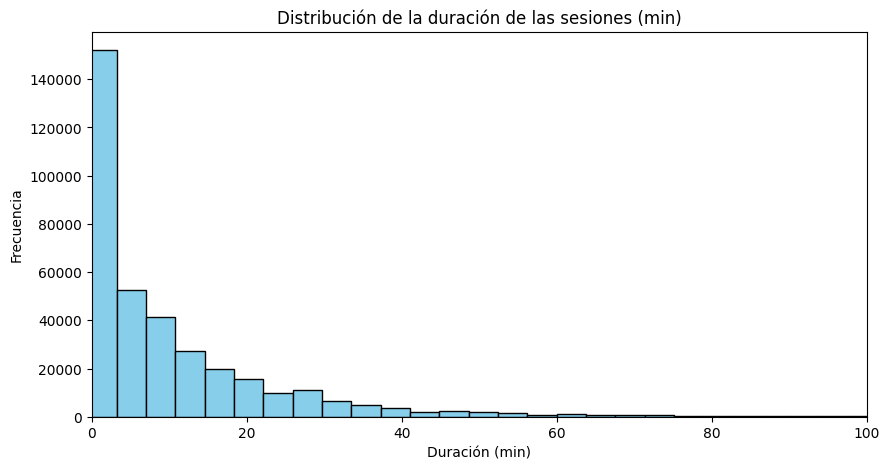

In [47]:
# Distribución de la duración de las sesiones
plt.figure(figsize=(10, 5))
plt.hist(df_visits['session_duration'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribución de la duración de las sesiones (min)')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.xlim(0, 100)
plt.show()

## ¿Con qué frecuencia los usuarios regresan?

In [27]:
df_return=df_visits
# Asegúrate de que 'Start Ts' sea datetime
df_return['Start Ts'] = pd.to_datetime(df_return['Start Ts'])

# Ordenar por usuario y fecha de inicio
df_return = df_return.sort_values(by=['Uid', 'Start Ts'])

# Calcular la diferencia en días entre sesiones consecutivas por usuario
df_return['session_gap_days'] = df_return.groupby('Uid')['Start Ts'].diff().dt.total_seconds() / (60 * 60 * 24)

# Calcular el promedio de días entre sesiones por usuario
avg_days_between_sessions = df_return.groupby('Uid')['session_gap_days'].mean().reset_index()

# Renombrar la columna para claridad
avg_days_between_sessions.rename(columns={'session_gap_days': 'avg_days_between_sessions'}, inplace=True)

display(avg_days_between_sessions.head())

,Uid,avg_days_between_sessions
0,11863502262781,NaN
1,49537067089222,NaN
2,297729379853735,NaN
3,313578113262317,86.886806
4,325320750514679,148.919444


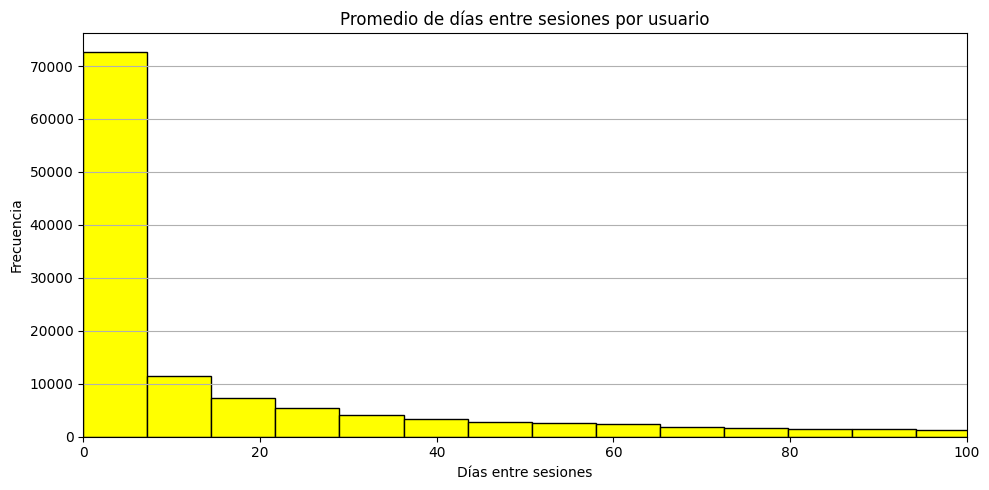

In [28]:
# Crear histograma
plt.figure(figsize=(10, 5))
plt.hist(df_return['session_gap_days'], bins=50, color='yellow', edgecolor='black')

# Títulos y etiquetas
plt.title('Promedio de días entre sesiones por usuario')
plt.xlabel('Días entre sesiones')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

## ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [16]:
#Obtener la primera visita
first_visit = df_visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts':'first_visit'})
display(first_visit.head())
#Obtener la primera compra
first_order=df_orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts':'first_buy'})
display(first_order.head())

,Uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


,Uid,first_buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [17]:
#Unir los df para obtener la conversión
conversion = pd.merge(first_visit,first_order, on="Uid", how="inner")
conversion["conversion_days"] = (conversion['first_buy']-conversion['first_visit']).dt.days
display(conversion.head())

,Uid,first_visit,first_buy,conversion_days
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


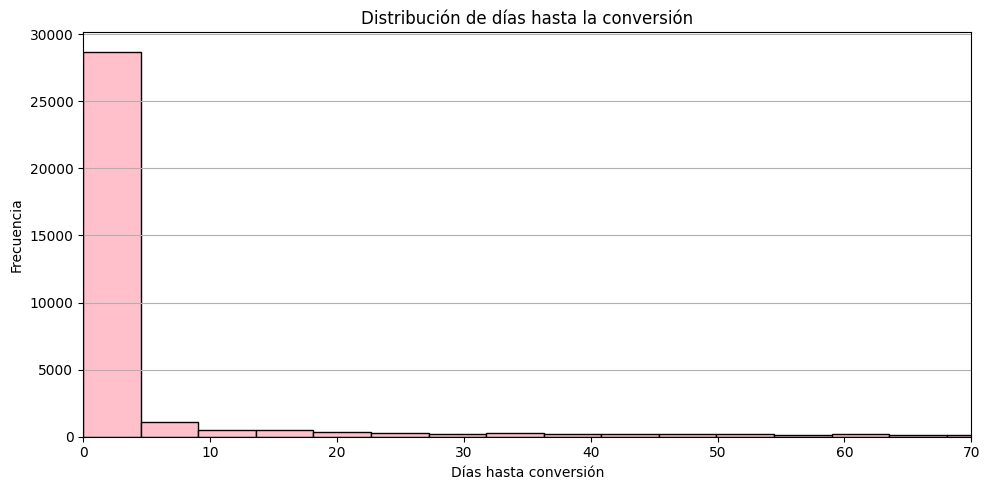

In [48]:
# Crear histograma
plt.figure(figsize=(10, 5))
plt.hist(conversion["conversion_days"], bins=80, color='pink', edgecolor='black')

# Etiquetas y título
plt.title('Distribución de días hasta la conversión')
plt.xlabel('Días hasta conversión')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.xlim(0, 70)
plt.tight_layout()
plt.show()

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [18]:
#Pedidos por día
df_orders['order_date']=df_orders['Buy Ts'].dt.date
orders_per_day=df_orders.groupby('order_date')['Buy Ts'].count().reset_index()

display(orders_per_day)

,order_date,Buy Ts
0,2017-06-01,96
1,2017-06-02,111
2,2017-06-03,67
3,2017-06-04,66
4,2017-06-05,161
...,...,...
359,2018-05-28,188
360,2018-05-29,189
361,2018-05-30,208
362,2018-05-31,610


## ¿Cuál es el tamaño promedio de compra?

In [19]:
#Promedio de compra por mes
df_buy_month=orders_per_day
df_buy_month['buy_month'] = pd.to_datetime(orders_per_day['order_date']).dt.to_period('M').astype(str)
df_buy_month=df_buy_month.groupby("buy_month")['Buy Ts'].mean().reset_index()
display(df_buy_month.head())

,buy_month,Buy Ts
0,2017-06,78.466667
1,2017-07,76.225806
2,2017-08,58.290323
3,2017-09,112.900000
4,2017-10,183.193548


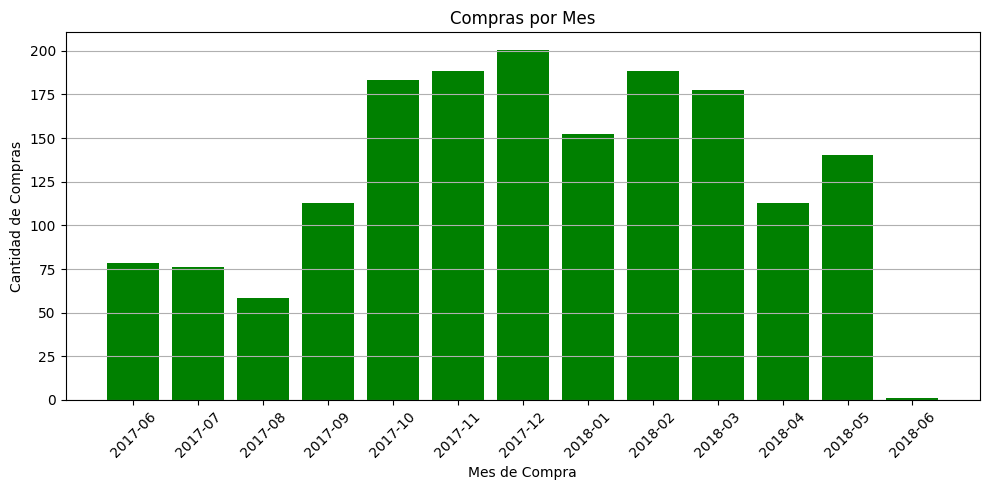

In [20]:
# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(df_buy_month['buy_month'], df_buy_month['Buy Ts'], color='green')

# Añadir títulos y etiquetas
plt.title('Compras por Mes')
plt.xlabel('Mes de Compra')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## ¿Cuánto dinero traen? (LTV)

In [21]:
ltv_per_user = df_orders.groupby('Uid')['Revenue'].sum().reset_index()
print("Ejemplo de LTV por usuario:")
display(ltv_per_user.head(10))

Ejemplo de LTV por usuario:


,Uid,Revenue
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99
5,3077748354309989,4.67
6,3605148382144603,0.69
7,3753586865891862,3.50
8,4808417689019433,1.22
9,4992223027560440,3.05


## ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [22]:
#Sumar los costos de marketing
print(f"Gasto total de marketing: ${df_costs['costs'].sum():.2f}")

Gasto total de marketing: $329131.62


## ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [32]:
#Gasto por fuente
costs_per_font=df_costs.groupby("source_id")['costs'].sum().reset_index()
display(costs_per_font)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  7 non-null      int64  
 1   costs      7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


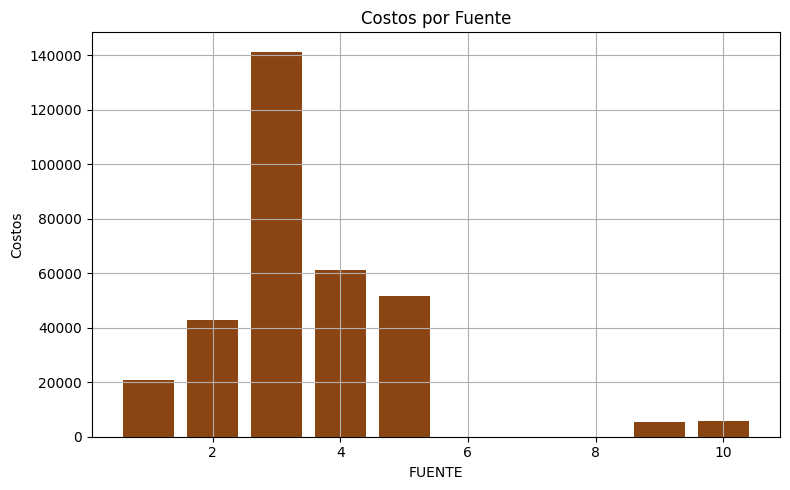

In [35]:
# Crear gráfico de líneas
plt.figure(figsize=(8, 5))
plt.bar(costs_per_font['source_id'], costs_per_font['costs'], color='saddlebrown')

# Etiquetas y título
plt.title('Costos por Fuente')
plt.xlabel('FUENTE')
plt.ylabel('Costos')
plt.grid(True)
plt.tight_layout()
plt.show()

## ¿Cuán rentables eran las inversiones? (ROMI)

In [24]:
#Obtener la fuente de los usuarios que compraron considerando el primer inicio de sesión (por la cual conoció el negocio)
users_source = df_visits.sort_values(by="Start Ts").groupby("Uid").first().reset_index()[['Uid','Source Id']]
#Unir el df de conversión con el de la fuente
conversion_with_source = pd.merge(conversion,users_source,on="Uid",how="left")
#Obtener usuarios unicos por fuente
customers_by_source = conversion_with_source.groupby("Source Id")['Uid'].nunique()

#Crear y hacer los calculos para CAC
df_cac = pd.merge(costs_per_font,customers_by_source,left_on='source_id', right_on='Source Id',how="left")
df_cac['cac'] = df_cac['costs'] / df_cac['Uid']
df_cac = df_cac.rename(columns={'Uid': 'customers'})
display(df_cac)

,source_id,costs,customers,cac
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479
5,9,5517.49,1088,5.071222
6,10,5822.49,1329,4.381106


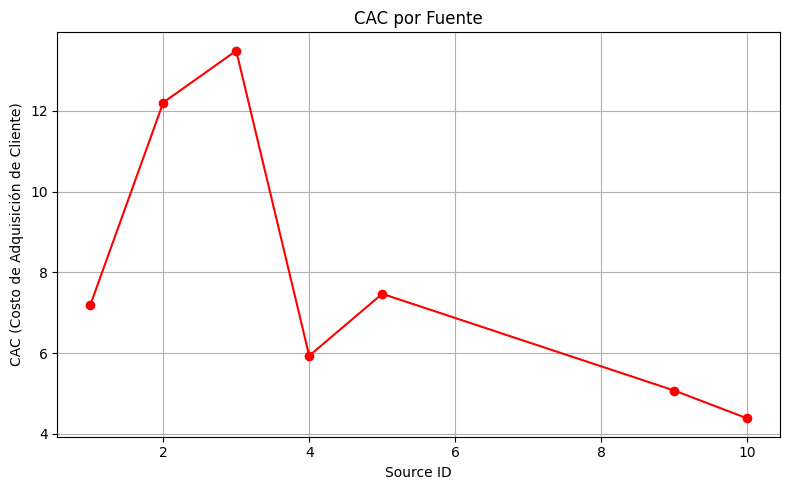

In [38]:
# Crear gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(df_cac['source_id'], df_cac['cac'], color='red', marker='o')

# Etiquetas y título
plt.title('CAC por Fuente')
plt.xlabel('FUENTE')
plt.ylabel('CAC (Costo de Adquisición de Cliente)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
#Cuanto recurso se percibió de acuerdo a cada plataforma o fuente

#Obtener la fuente por usuario en cada compra
ordes_with_source = pd.merge(df_orders,users_source, on="Uid", how="left")

#Obtener las ventas por plataforma
revenue_by_source = ordes_with_source.groupby("Source Id")['Revenue'].sum()

#Obtener ROMI creando un dataframe
df_romi=pd.merge(revenue_by_source,costs_per_font,left_on='Source Id', right_on='source_id',how="left")
df_romi['romi'] = (df_romi['Revenue']-df_romi['costs']) / df_romi['costs']

df_romi.head(10)

,Revenue,source_id,costs,romi
0,31090.55,1.0,20833.27,0.492351
1,46923.61,2.0,42806.04,0.096191
2,54511.24,3.0,141321.63,-0.614275
3,56696.83,4.0,61073.60,-0.071664
4,52624.02,5.0,51757.10,0.016750
5,1.22,NaN,NaN,NaN
6,5759.40,9.0,5517.49,0.043844
7,4450.33,10.0,5822.49,-0.235665


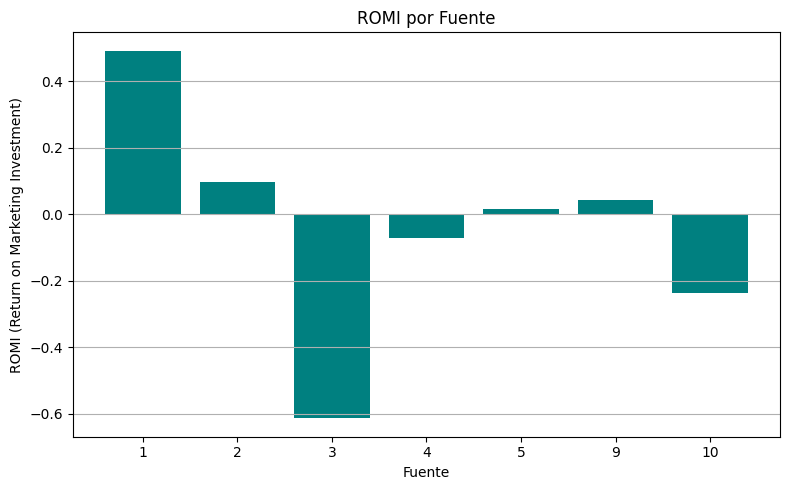

In [50]:
# Limpiar datos: quitar filas con NaN en source_id o romi
df_romi_clean = df_romi.dropna(subset=['source_id', 'romi']).copy()

# Asegurar que source_id sea entero (opcional, solo si deseas)
df_romi_clean['source_id'] = df_romi_clean['source_id'].astype(int)

# Ordenar por source_id (opcional pero útil para presentación)
df_romi_clean = df_romi_clean.sort_values('source_id')

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_romi_clean['source_id'].astype(str), df_romi_clean['romi'], color='teal')

# Etiquetas
plt.title('ROMI por Fuente')
plt.xlabel('Fuente')
plt.ylabel('ROMI (Return on Marketing Investment)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

- La fuente 3 y 10 debe ser eliminada
- Invertir más en la fuente 1 ya que genera poco costo y mayor beneficio